# Fitting

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a0 = 2
a1 = 1
x1 = np.linspace(1, 4, 10)

In [129]:
np.random.seed(123)
y1 = a0 + a1*x1 
y2 = a0 + a1*x1 + np.random.normal(0.0, 0.1,  size=len(x1))

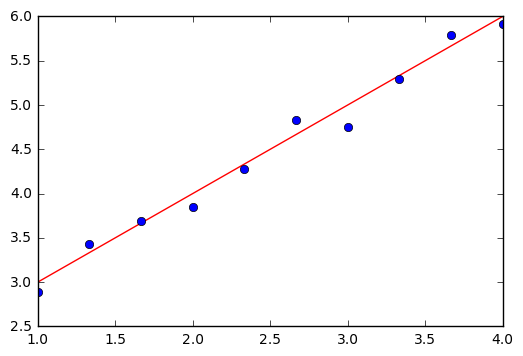

In [130]:
plt.plot(x1, y1, 'r-')
plt.plot(x1, y2, 'bo')

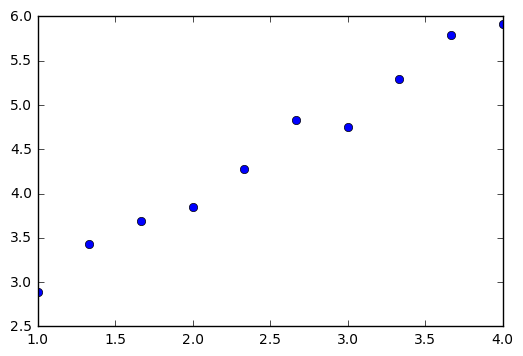

In [131]:
plt.plot(x1, y2, 'bo')

In [43]:
def least(x, y):
    n= len(x)
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumx2 = np.sum(x**2)
    sumxy = np.sum(x*y)
    
    a1 = (n*sumxy - sumx*sumy)/(n*sumx2 - sumx**2)
    a0 = sumy/n- a1*sumx/n
    
    return a0, a1

In [133]:
a,b = least(x1, y2)
a,b

(1.9741412296024894, 0.9995628637459512)

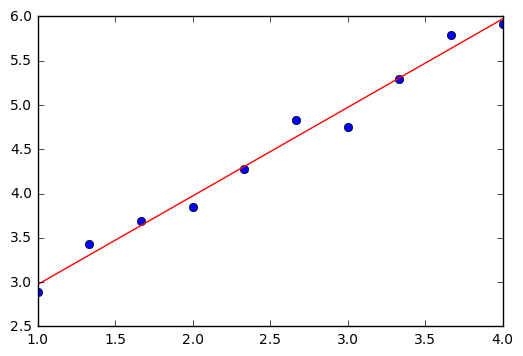

In [134]:
plt.plot(x1, y2, 'bo')
plt.plot(x1, a + b*x1, 'r-')
#plt.plot(x, y1, 'g-')

# On a grid

In [135]:
def loglike(a, b):
    return np.sum((y2- a- b*x1)**2)

/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


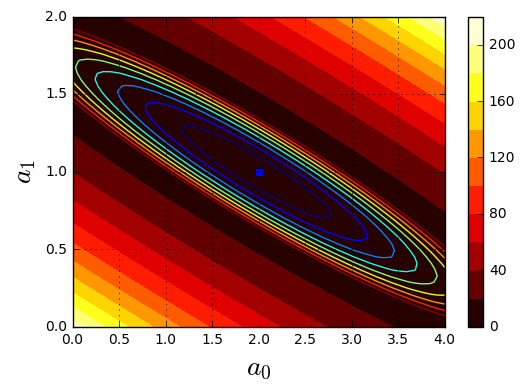

In [143]:
from matplotlib import ticker, cm

x = np.linspace(0, 4, 50)
y = np.linspace(0, 2, 50)

grid = [ list(map(lambda p: loglike(p, b=i), x) ) for i in y]

fig, ax = plt.subplots()
gs = ax.contourf(x, y, grid, 10, cmap='hot')
cbar = fig.colorbar(gs)

CS = ax.contour(x, y, grid, np.arange(1, 10, 1))
ax.clabel(CS, inline=2, fontsize=100)

plt.plot(2,1, 's')
plt.ylabel('$a_1$',fontsize=20)
plt.xlabel('$a_0$',  fontsize=20)
plt.grid()
plt.show()

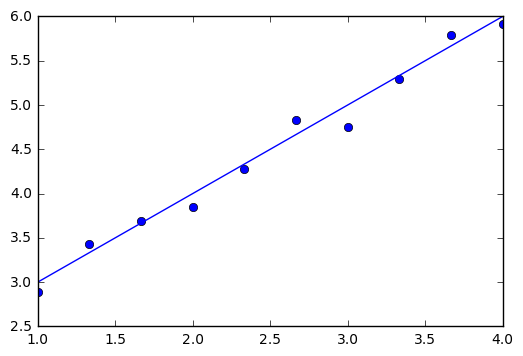

In [180]:
plt.plot(x1, y2, 'bo')
plt.plot(x1, 2 + 1.*x1, 'b-')

#degeneracy
#plt.plot(x1, 2.45 + 0.81*x1, 'r-')
#plt.plot(x1, 1.5 + 1.14*x1, 'r-')


#plt.plot(x1, 1.5 + 0.75*x1, 'g-')
#plt.plot(x1, 2.5 + 1.75*x1, 'g-')

In [172]:
loglike(2.45, 0.81)

0.4822770194589069

In [173]:
loglike(1.5, 1.14)

0.48504266621432646

In [181]:
loglike(2, 1)

0.16010884959349683

In [185]:
def rcorr(x, y):
    n= len(x)
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumx2 = np.sum(x**2)
    sumy2 = np.sum(y**2)
    sumxy = np.sum(x*y)
    
    r1 = n*sumxy - sumx*sumy 
    r2 = np.sqrt((n*sumx2 -sumx**2)*(n*sumy2 - sumy**2 )  ) 
    
    return r1/r2

In [187]:
rcorr(x1, y2) #  percent of the original 
             #   uncertainty has been explained by the linear model.
#rcorr(x1, y1)

0.9917588112963504

In [190]:
#z = -1 + 5*x1 + np.random.normal(0.0, 0.2,  size=len(x1))
#np.savetxt('fit.txt', np.c_[ x1, z])

In [191]:
%ls

1_HW.ipynb               Interpolation.ipynb      cadenas_2.txt
1_Intro_to_python.ipynb  Optimization.ipynb       fit.txt
7_Symbolic_python.ipynb  Roots.ipynb              myfile.txt
8_Symbolic_python.ipynb  Untitled.ipynb           myfile2.txt
Curso_BUAP.ipynb*        animation_cadenas.py     myfilet.txt
Error_estimates.ipynb    cadenas_0.txt
Fitting.ipynb            cadenas_1.txt


## Linearization 

$y = be^{ax}$   ($y=bx^a$)

In [71]:
x1 = np.linspace(1, 3, 15)
y2 = 2*np.exp(3*x1 + np.random.normal(0.0, 0.2,  size=len(x1)))

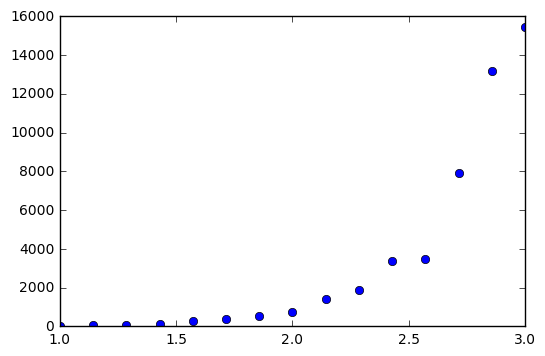

In [72]:
plt.plot(x1, y2, 'bo')

$ln y = lnb + ax$

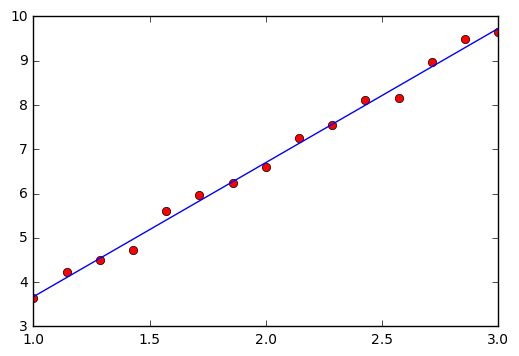

In [76]:
plt.plot(x1, np.log(y2) ,'ro')
plt.plot(x1, 0.64+ 3.03*x1)

In [74]:
least(x1, np.log(y2))

(0.6437661157355183, 3.0342264811345383)

https://scikit-learn.org/stable/modules/linear_model.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares

https://towardsdatascience.com/least-squares-linear-regression-in-python-54b87fc49e77

## Ver clase 11 de Pyhton

## Ver presentacion Gto_06_2019

## Ver clase 14 - Figuras/plots sns

## Ver clase 20 -- Casas, Titanic

# Padé

In [1]:
import numpy as np

In [3]:
a = np.array( [ [0,0,0,1/24., -1/6.],[0,0,0, -1/6., 1/2.],[0,0,-1, 1/2., -1],
               [0,-1, 0, -1, 1],[-1, 0,0, 1, 0] ])
b = [1/120., -1/24., 1/6., -1/2., 1]

In [4]:
x = np.linalg.solve(a, b)
x

array([-0.6       ,  0.15      , -0.01666667,  0.4       ,  0.05      ])

In [6]:
from mpmath import *

In [27]:
#mp.dps = 15; mp.pretty = True

one = mpf(1)
def f(x):
    return exp(-x) #sqrt((one + 2*x)/(one + x))


In [28]:
a = taylor(f, 0, 6)
a

[1.0,
 -1.0,
 0.5,
 -0.166666666666667,
 0.0416666666666667,
 -0.00833333333333333,
 0.00138888888888889]

In [29]:
p, q = pade(a, 3, 2)

In [30]:
p, q

([1.0, -0.6, 0.15, -0.0166666666666666], [1.0, 0.4, 0.05])

In [31]:
x = 1
polyval(p[::-1], x)/polyval(q[::-1], x)

0.367816091954023

In [32]:
f(x)

0.367879441171442

# Chevishev

In [54]:
import numpy.polynomial.chebyshev as C

x =np.linspace(0,1,10)
C.chebfit(x,np.exp(-x), 5)

array([ 1.26419878e+00, -1.12693503e+00,  2.68993486e-01, -4.28533702e-02,
        4.79460243e-03, -3.19127983e-04])

# Fourier

In [124]:
from sympy import fourier_series, pi
from sympy.abc import x

In [96]:
s = fourier_series(np.abs(x), (x, -pi, pi))

In [97]:
s.truncate(4)

-4*cos(x)/pi - 4*cos(3*x)/(9*pi) - 4*cos(5*x)/(25*pi) + pi/2

In [100]:
r1 =s.truncate(2)
r2 =s.truncate(3)
r3 =s.truncate(4)

In [99]:
r.evalf(subs={x: 3.0}, n=21)

2.83129392245767488651

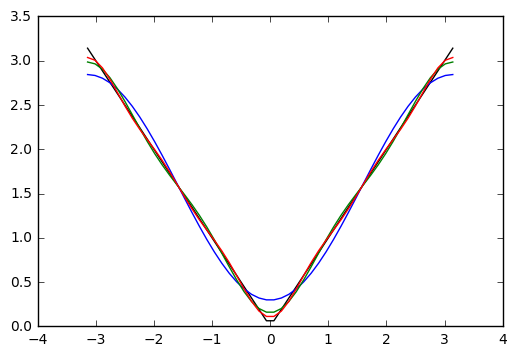

In [109]:
x0 = np.linspace(-np.pi, np.pi, 50)
plt.plot(x0, np.abs(x0), 'k-')
plt.plot(x0, [r1.evalf(subs={x: i}) for i in x0], 'b-',label='approx 1')
plt.plot(x0, [r2.evalf(subs={x: i}) for i in x0], 'g-',label='approx 2')
plt.plot(x0, [r3.evalf(subs={x: i}) for i in x0], 'r-', label='approx 3')

# Least-squares

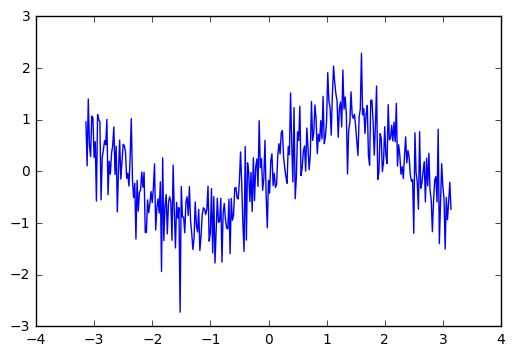

In [134]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(-np.pi, np.pi, time_step)

sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.plot(time_vec, sig, label='Original signal')
plt.show()

In [146]:
N  = len(sig)
w0 = 2 * np.pi / period 
A0 = sum(sig)/N
A1 = 2./N*np.sum(sig*np.cos(w0*time_vec))
B1 = 2./N*np.sum(sig*np.sin(w0*time_vec))

In [149]:
A0, A1, B1

(0.02690025788391732, -0.039930126669766114, 0.8863319369336895)

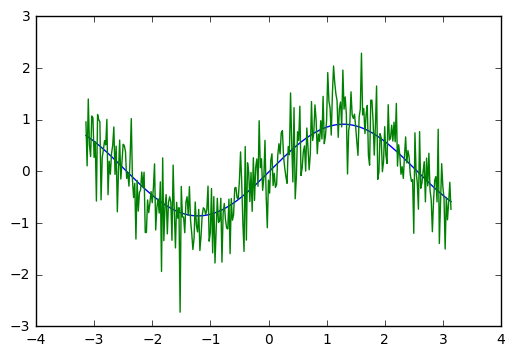

In [148]:
plt.plot(time_vec, A0 + A1*np.cos(w0*time_vec) +B1*np.sin(w0*time_vec))
plt.plot(time_vec, sig)

$S_3 = \frac{a0}{2} + a_3 cos(3z) + \sum^2_1(a_k cos(kz) + b_k sin(kz))$

In [282]:
def func(x):
    return x**4 - 3*x**3 + 2*x**2 - np.tan(x*(x-2) )

In [283]:
def func2(x):
    return func(1 + x/np.pi)

requires transformation from [0,2] to [-pi, pi]. 
The linear transformation is z = pi*(x-1)

In [408]:
def ak(k, zi):
    s =np.sum(list(map(func2, zi))* np.cos(k*zi))/int(len(zi)/2 + 1)
    return s

def bk(k, zi):
    s =np.sum(list(map(func2, zi))* np.sin(k*zi))/int(len(zi)/2 + 1)
    return s

In [424]:
N = 30

x0 = np.linspace(0.125, 1.875, N)
y0 = [func(i) for i in x0]

In [425]:
x1 = np.linspace(-np.pi*0.875, np.pi*0.875, N)
y1 = [func2(i) for i in x1]

In [426]:
a0 = ak(np.zeros(len(x1)), x1)
a1 = ak(np.ones(len(x1)), x1)
a2 = ak(2*np.ones(len(x1)), x1)
a3 = ak(3*np.ones(len(x1)), x1)

b1 = bk(np.ones(len(x1)), x1)
b2 = bk(2*np.ones(len(x1)), x1)

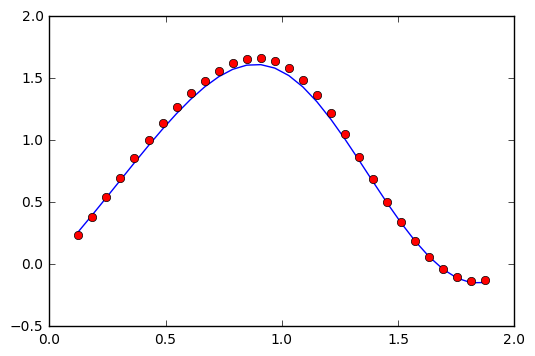

In [427]:
plt.plot(x0, y0)
plt.plot(x0, a0/2. + a1*np.cos(1*x1) + a2*np.cos(2*x1) + a3*np.cos(3*x1) + b1*np.sin(x1) + b2*np.sin(2*x1), 'ro')

In [402]:
from scipy import signal

In [117]:
t = np.linspace(0, 1, 500)
s = signal.square(2 * np.pi * 5 * t)

(-2, 2)

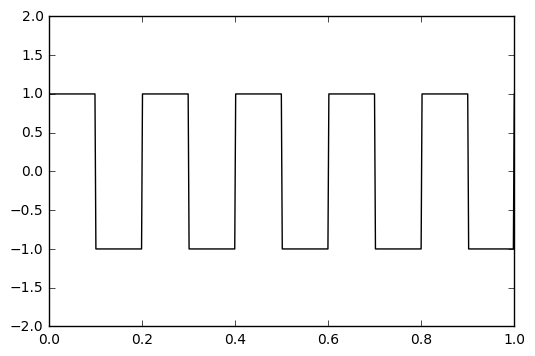

In [119]:
plt.plot(t, s, 'k-')
plt.ylim(-2, 2)